# RSI: 상대강도지수

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# RSI: 상대강도지수
df = fdr.DataReader("005930")

delta = df["Close"].diff()   # 전날 대비 종가의 차이값 저장

# 상승분과 하락분 분리 
gain = delta.where(delta > 0, 0).rolling(window = 14).mean()        # 14일 간의 상승분의 평균
       # 0보다 큰것만 가져오고, 그렇지 않은건 0으로 채워라
loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()
loss

Date
2013-04-11           NaN
2013-04-12           NaN
2013-04-15           NaN
2013-04-16           NaN
2013-04-17           NaN
                 ...    
2025-06-25    385.714286
2025-06-26    464.285714
2025-06-27    464.285714
2025-06-30    492.857143
2025-07-01    492.857143
Name: Close, Length: 3000, dtype: float64

In [59]:
# 최근 값에 가중치 주는 RSI 계산법 (지수이동평균)
gain = delta.where(delta > 0, 0).ewm(alpha = 1 / 14, adjust = False, min_periods = 14).mean()
loss = -delta.where(delta < 0, 0).ewm(alpha = 1 / 14, adjust = False, min_periods = 14).mean()

In [60]:
# RS: 상대강도....... RS = 평균 상승값 / 평균 하락값
RS = gain / (loss + 1e-10)
RS

Date
2013-04-11         NaN
2013-04-12         NaN
2013-04-15         NaN
2013-04-16         NaN
2013-04-17         NaN
                ...   
2025-06-25    1.703644
2025-06-26    1.369374
2025-06-27    1.484629
2025-06-30    1.230149
2025-07-01    1.442434
Name: Close, Length: 3000, dtype: float64

In [61]:
RSI = 100 - (100 / (1 + RS))
RSI

Date
2013-04-11          NaN
2013-04-12          NaN
2013-04-15          NaN
2013-04-16          NaN
2013-04-17          NaN
                ...    
2025-06-25    63.012883
2025-06-26    57.794753
2025-06-27    59.752548
2025-06-30    55.159954
2025-07-01    59.057232
Name: Close, Length: 3000, dtype: float64

In [62]:
# RSI 계산 함수

def calculate_rsi(data, window = 14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window = 14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()
    RS = gain / (loss + 1e-10)
    RSI = 100 - (100 / (1 + RS))
    return RSI

In [63]:
calculate_rsi(df["Close"])

Date
2013-04-11          NaN
2013-04-12          NaN
2013-04-15          NaN
2013-04-16          NaN
2013-04-17          NaN
                ...    
2025-06-25    46.788991
2025-06-26    48.623853
2025-06-27    40.425532
2025-06-30    51.086957
2025-07-01    50.000000
Name: Close, Length: 3000, dtype: float64

In [64]:
# RSI 값이 70 이상이면 매도신호 / 30 이하라면 매수신호
import numpy as np

df["RSI"] = calculate_rsi(df["Close"])
df = df.dropna()
df

,Open,High,Low,Close,Volume,Change,RSI
Date,,,,,,,
2013-04-30,1818,1849,1788,1849,3161,0.023243,28.544776
2013-05-02,1873,1873,1818,1819,920,-0.016225,27.767695
2013-05-03,1806,1861,1806,1819,2390,0.000000,38.154613
2013-05-06,1867,1867,1702,1819,1869,0.000000,35.248042
2013-05-07,1831,1922,1812,1831,3100,0.006597,40.000000
...,...,...,...,...,...,...,...
2025-06-25,7800,7890,7800,7870,987,0.001272,46.788991
2025-06-26,7880,7890,7760,7890,273,0.002541,48.623853
2025-06-27,8010,8010,7870,7900,7945,0.001267,40.425532


In [65]:
import warnings
warnings.filterwarnings("ignore")

df["Signal"] = np.where(df["RSI"] >= 70, "매도", "보유")
df["Signal"] = np.where(df["RSI"] <= 30, "매수", df["Signal"])
df

,Open,High,Low,Close,Volume,Change,RSI,Signal
Date,,,,,,,,
2013-04-30,1818,1849,1788,1849,3161,0.023243,28.544776,매수
2013-05-02,1873,1873,1818,1819,920,-0.016225,27.767695,매수
2013-05-03,1806,1861,1806,1819,2390,0.000000,38.154613,보유
2013-05-06,1867,1867,1702,1819,1869,0.000000,35.248042,보유
2013-05-07,1831,1922,1812,1831,3100,0.006597,40.000000,보유
...,...,...,...,...,...,...,...,...
2025-06-25,7800,7890,7800,7870,987,0.001272,46.788991,보유
2025-06-26,7880,7890,7760,7890,273,0.002541,48.623853,보유
2025-06-27,8010,8010,7870,7900,7945,0.001267,40.425532,보유


In [66]:
signal = df[(df["Signal"] == "매수") | (df["Signal"] == "매도")]
signal

,Open,High,Low,Close,Volume,Change,RSI,Signal
Date,,,,,,,,
2013-04-30,1818,1849,1788,1849,3161,0.023243,28.544776,매수
2013-05-02,1873,1873,1818,1819,920,-0.016225,27.767695,매수
2013-05-14,1971,2302,1971,2303,77074,0.149775,76.888889,매도
2013-05-15,2345,2645,2333,2646,97719,0.148936,80.811808,매도
2013-05-22,2510,2749,2394,2731,62162,0.137443,71.428571,매도
...,...,...,...,...,...,...,...,...
2025-05-27,7330,7420,7300,7300,8606,-0.020134,21.691974,매수
2025-05-28,7440,7520,7340,7520,5083,0.030137,25.311203,매수
2025-05-29,7350,7580,7350,7580,5187,0.007979,27.118644,매수


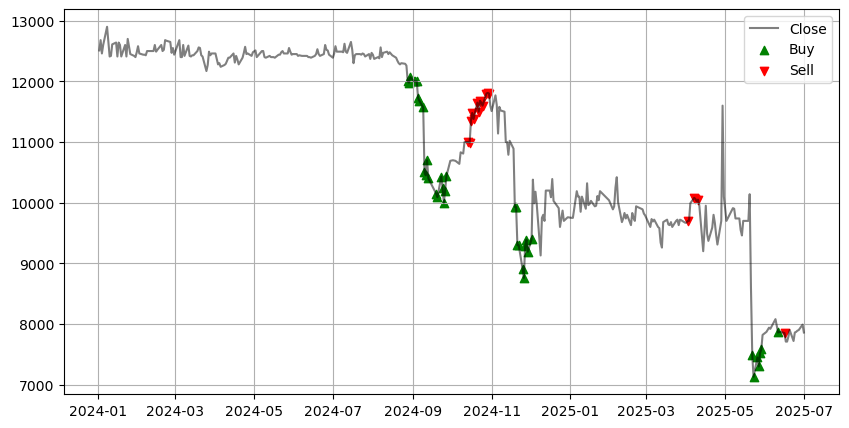

In [67]:
df2 = df[df.index.year >= 2024]

plt.figure(figsize = (10, 5))
plt.plot(df2['Close'], color = 'k', alpha = 0.5)

buy = df2[df2['Signal'] == "매수"]       # 매수 신호 (=사람들이 많이 구매해서 RSI 값이 올랐을때)
plt.scatter(buy.index, buy['Close'], marker = '^', color = 'green')

sell = df2[df2['Signal'] == "매도"]      # 매도 신호
plt.scatter(sell.index, sell['Close'], marker = 'v', color = 'red')

plt.legend(['Close', 'Buy', 'Sell'])
plt.grid()
plt.show()

## BackTesting 전략
트레이딩 전략에 과거의 데이터를 적용하여 수익성을 평가

즉, 과거의 데이터를 사용하여 전략이 어떻게 수행되었는지 확인

In [68]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

# rsi 계산 함수

def rsi_func(series, n):   # 시리즈값, 며칠씩 묶을지 n값 
    s = pd.Series(series)
    delta = s.diff()
    gain = delta.where(delta > 0, 0).rolling(window = 14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()
    RS = gain / (loss + 1e-10)
    RSI = 100 - (100 / (1 + RS))
    return RSI

In [69]:
class RsiStrategy(Strategy):
    
    period = 14
    stock_buy = 30
    stock_sell = 70

    def init(self):
        self.rsi = self.I(rsi_func, self.data.Close, self.period)      # rsi값으로 초기값 설명

    def next(self):
        # RSI가 30을 상향 돌파하고, 현재 포지션이 없는 경우
        if crossover(self.rsi, self.stock_buy) and not self.position:
            self.buy()

        # RSI가 70을 하향 돌파하고 현재 포지션이 있을 때
        elif crossover(self.stock_sell, self.rsi) and self.position:
            self.position.close()

In [70]:
df = fdr.DataReader("005930")
bt = Backtest(df, RsiStrategy, cash = 100000, commission=0.002)

stats = bt.run()
stats

# 그냥 잡고있었으면 100%(=2배)인데 (Buy & Hold Return), 이 전략을 실행했을때는 -18% (Return)

Backtest.run:   0%|          | 0/2986 [00:00<?, ?bar/s]

Start                     2013-04-11 00:00:00
End                       2025-07-01 00:00:00
Duration                   4464 days 00:00:00
Exposure Time [%]                        51.9
Equity Final [$]                    81857.952
Equity Peak [$]                    102435.952
Commissions [$]                      8952.048
Return [%]                          -18.14205
Buy & Hold Return [%]                99.67105
Return (Ann.) [%]                    -1.66749
Volatility (Ann.) [%]                14.58325
CAGR [%]                             -1.12371
Sharpe Ratio                         -0.11434
Sortino Ratio                        -0.16591
Calmar Ratio                          -0.0459
Alpha [%]                           -58.64971
Beta                                  0.40641
Max. Drawdown [%]                   -36.32835
Avg. Drawdown [%]                    -32.9539
Max. Drawdown Duration     4077 days 00:00:00
Avg. Drawdown Duration     2198 days 00:00:00
# Trades                          

In [71]:
from tqdm import tqdm

kospi = fdr.StockListing("KOSPI")

total = []

for i in tqdm(range(len(kospi))):
    try:
        row = kospi.iloc[i]
        code = row["Code"]
        name = row["Name"]
        df = fdr.DataReader(code)
        rsi = calculate_rsi(df["Close"]).iloc[-1]
        total.append([code, name, rsi])
    except:
        continue

100%|████████████████████████████████████████████████████████████████████████████████| 962/962 [01:45<00:00,  9.12it/s]


In [73]:
pd.DataFrame(total, columns = ["Code", "Name", "RSI"]).sort_values("RSI")

,Code,Name,RSI
852,005030,부산주공,0.000000
292,006380,카프로,0.000000
913,204210,스타에스엠리츠,0.000000
892,002210,동성제약,0.000000
890,005110,한창,0.000000
...,...,...,...
747,009180,한솔로지스틱스,89.062500
571,214330,금호에이치티,89.230769
690,011230,삼화전자,89.243028
65,298040,효성중공업,89.491525
